# Voltametria Cíclica

Neste programa, busquei os valores de tensão nos picos de corrente catódica e anôdica, para utiliza-los no processo de cronoamperometria.

![alt text](https://www.researchgate.net/profile/Haroldo_Ponte/publication/281409189/figure/fig3/AS:391720396181504@1470404828028/FIGURA-17-VOLTAMOGRAMA-CICLICO-CONFORME-PREVISTO-ATRAVES-DA-TEORIA-DE-NICHOLSON-E.png)

In [2]:
import scipy.io as sio
import matplotlib.pyplot as plt
mat_contents = sio.loadmat('./DownSampling/SCV.mat') # Fonte IEEE Data Base

In [3]:
mat_contents.keys()

dict_keys(['__header__', '__version__', '__globals__', 'CV0_58', 'CV16_83', 'CV1_08', 'CV2_16', 'CV33_66', 'CV4_25', 'CV8_41'])

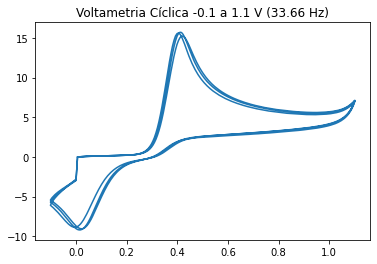

In [13]:
v = mat_contents['CV33_66']
t = v[0,6] # Amostra com 300 uM de paracetamol (maior concentracao)
# t[0] Tensão em V
# t[1] Corrente em uA
plt.plot(t[0],t[1])
plt.title('Voltametria Cíclica -0.1 a 1.1 V (33.66 Hz)')
plt.show()
f = 33.66 # Frequência de Amostragem


Tensões de Pico Catódico e Anôdico respectivamente
E_pa = 0.01190185546875 V
E_pc = 0.410614013671875 V
Potencial Redox Formal E_o = 0.2112579345703125 V


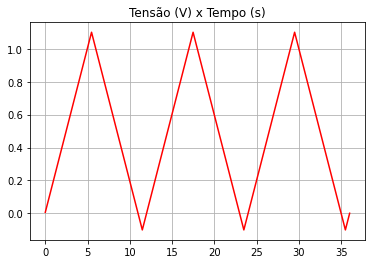

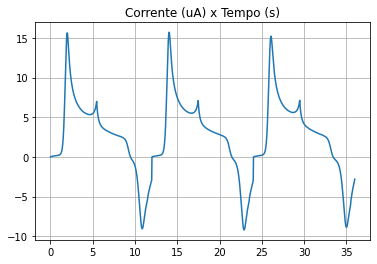

In [11]:
# Encontrar as correntes de pico catódica e anódica e seus respectivos valores de tensão
import numpy as np

# 33.66 Hz de amostragem --> 1 amostra a cada 0.02971 segundos --> Para 1212 amostras --> 36 segundos de amostragem
# 1212 (tamanho do array) 

t = np.linspace(0,36,1212,endpoint = True)

data = v[0,6]
i = data[1]
pot = data[0]

E_pa = pot[i.argmin()]
E_pc = pot[i.argmax()]
print("Tensões de Pico Catódico e Anôdico respectivamente")
print("E_pa = {} V".format(pot[i.argmin()]))
print("E_pc = {} V".format(pot[i.argmax()]))
E_o = (E_pa + E_pc)/2
print("Potencial Redox Formal E_o = {} V".format(E_o))
plt.plot(t,pot, color = 'r')
plt.title('Tensão (V) x Tempo (s)')
plt.grid()
plt.show()
plt.plot(t,i)
plt.title('Corrente (uA) x Tempo (s)')
plt.grid()
plt.show()

## Equação de Cottrel

Manter a tensão de pico catódico/anódico constante para observar a curva descrita pela Equação de Cottrel.
![alt text](https://www.scielo.br/img/revistas/qn/v31n8/44f1ab.gif)
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/1a3702fff4c2243bdea7a09e48670e0b59908a0f)
![alt text](https://www.scielo.br/img/revistas/qn/v31n8/44f1c.gif)

n = numero de eletrons da reação eletroquímica (cte)

F = Constante de Faraday (cte)

A = área do eletrodo de trabalho (cte construtiva)

c = Concentração inicial da amostra (poder ser algo que eu sei (controle) ou uma variável)

D = Difusividade do eletrodo (descobrir no início com uma concentração de controle)

$i(t) = b t^{-1/2}$

$b = \frac{nFAc \sqrt D}{\sqrt \pi}$

$ D = (\frac{b \sqrt \pi}{nFAc})^2 $

$c = \frac{b \sqrt \pi}{nFA\sqrt D}$

Futuramente encontrar dados de tempo e corrente para aplicar a regressão

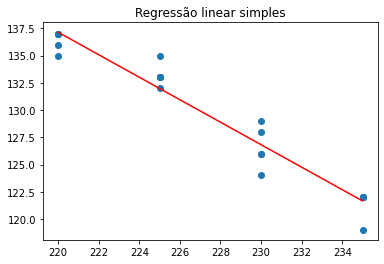

[-1.032] 364.17999999999984 0.9417657045840407


In [15]:
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt

x = np.array([ 220, 220, 220, 220, 220, 225, 225, 225, 225, 225, 230, 230, 230, 230, 230, 235, 235, 235, 235, 235 ])

y = np.array([ 137, 137, 137, 136, 135, 135, 133, 132, 133, 133, 128, 124, 126, 129, 126, 122, 122, 122, 119, 122 ])

x = x.reshape(-1,1)

regressor = LinearRegression()
regressor.fit(x,y)

# y = b0 + b1*x 

b1 = regressor.coef_ # Para a pesquisa so vou precisar do b1

b0 = regressor.intercept_ 

plt.scatter(x,y)
plt.plot(x,regressor.predict(x), color = 'red')
plt.title('Regressão linear simples')
plt.show()

print(b1,b0, regressor.score(x,y))
